In [3]:
import pandas as pd
import math
import plotly.express as px
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

In [4]:
filepath = 'WSDC 2023 Tab - Speaker Rankings.csv'
df = pd.read_csv(filepath)
df.head()

,Rank,Name,Team,R1,R2,R3,R4,R5,R6,R7,R8,Avg,Stdev,Num
0,1,Annushka Agarwal,🇨🇦Canada,—,72,74,75.83,74,—,75,74.17,74.17,1.17,6
1,2,Hitishaa Goyal,🇮🇳India,73.17,73.67,73.33,72.83,72.83,74.33,75.33,77.33,74.1,1.45,8
2,3,Rai Daud Ali Saif,🇵🇰Pakistan,72.33,74.33,74.67,75,73.83,74,—,74.5,74.1,0.81,7
3,4,Shayor Ahmad Khan,🇧🇩Bangladesh,73.5,73.83,74.5,73.17,74,73.67,74.83,—,73.93,0.53,7
4,5,Sophie Hannigan,🦄Scotland,72.67,—,74.17,73.67,73,75.5,74,74.17,73.88,0.85,7


(array([0.01973684, 0.01315789, 0.02631579, 0.04605263, 0.15131579,
        0.22368421, 0.17105263, 0.20394737, 0.31578947, 0.25657895,
        0.22368421, 0.15131579, 0.11184211, 0.06578947, 0.01973684]),
 array([67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. ,
        72.5, 73. , 73.5, 74. , 74.5]),
 <BarContainer object of 15 artists>)

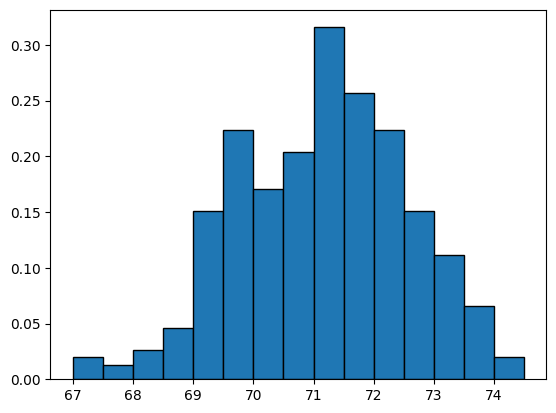

In [5]:
# Convert the 'Avg' column to numeric, handling non-numeric values
df['Avg'] = pd.to_numeric(df['Avg'], errors='coerce')

min_ = math.floor(df['Avg'].min())
max_ = math.ceil(df['Avg'].max())

bins = np.arange(min_, max_, 0.5)
plt.hist(df['Avg'].dropna(), bins=bins, edgecolor='black', density=True)    

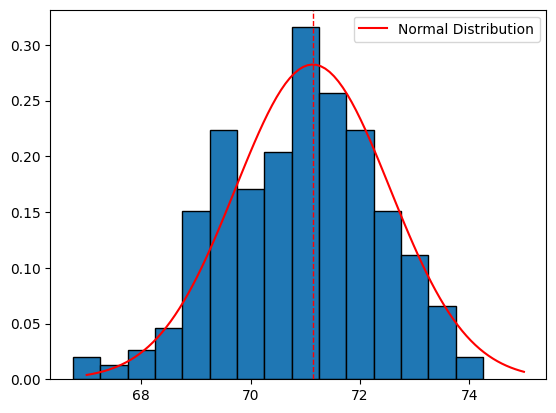

In [7]:
res = 100
x = np.linspace(min_, max_, res)
y = norm.pdf(x, df['Avg'].mean(), df['Avg'].std())  

plt.plot(x, y, color='red', label='Normal Distribution')
plt.legend()
plt.hist(df['Avg'].dropna(), bins=bins, edgecolor='black', density=True,  label='Histogram', align='left')
plt.axvline(df['Avg'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.show()